In [ ]:
!pip install numpy==1.24.4
!pip install scikit-learn==1.3.2
!pip install scikit-learn-extra==0.3.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 471.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


## Tiền xử lý

### Overview

In [ ]:
import pandas as pd

df= pd.read_csv('/content/data.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### Xóa cột miss ID

In [ ]:
missing_customer = df[df['CustomerID'].isnull()]
missing_customer.info()


<class 'pandas.core.frame.DataFrame'>
Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135080 non-null  object        
 1   StockCode    135080 non-null  object        
 2   Description  133626 non-null  object        
 3   Quantity     135080 non-null  int64         
 4   InvoiceDate  135080 non-null  datetime64[ns]
 5   UnitPrice    135080 non-null  float64       
 6   CustomerID   0 non-null       object        
 7   Country      135080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.3+ MB


In [ ]:
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


### Quantity < 0 và Unitprice = 0

In [ ]:
# Kiểm tra số lượng âm (thường là hàng bị trả lại)
print("Số dòng có Quantity âm:", (df['Quantity'] < 0).sum())

# Kiểm tra giá sản phẩm âm hoặc bằng 0 (không hợp lệ)
print("Số dòng có UnitPrice <= 0:", (df['UnitPrice'] <= 0).sum())


Số dòng có Quantity âm: 8905
Số dòng có UnitPrice <= 0: 40


In [ ]:
under_quan = df[df['Quantity'] < 0]
under_quan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [ ]:
# Loại bỏ các dòng có Quantity <= 0 hoặc UnitPrice <= 0
df = df[(df['Quantity'] > 0)]


In [ ]:
under_unit = df[df['UnitPrice'] <= 0]
under_unit.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


In [ ]:
mean_price_per_product = df[df['UnitPrice'] > 0].groupby('StockCode')['UnitPrice'].mean()

# Tạo mask các dòng có giá = 0
mask_zero_price = df['UnitPrice'] == 0

# Với mỗi dòng có giá = 0, thay bằng giá trung bình tương ứng theo StockCode
df.loc[mask_zero_price, 'UnitPrice'] = df.loc[mask_zero_price, 'StockCode'].map(mean_price_per_product)


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


### Kiểm tra các stockcode bất thường

In [ ]:
invalid_stockcode = df[~df['StockCode'].str.match('^[0-9]', na=False)]
print(invalid_stockcode)


       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45        536370      POST     POSTAGE         3 2010-12-01 08:45:00   
386       536403      POST     POSTAGE         1 2010-12-01 11:27:00   
1123      536527      POST     POSTAGE         1 2010-12-01 13:04:00   
1423      536540        C2    CARRIAGE         1 2010-12-01 14:05:00   
2239      536569         M      Manual         1 2010-12-01 15:35:00   
...          ...       ...         ...       ...                 ...   
541198    581493      POST     POSTAGE         1 2011-12-09 10:10:00   
541216    581494      POST     POSTAGE         2 2011-12-09 10:13:00   
541730    581570      POST     POSTAGE         1 2011-12-09 11:59:00   
541767    581574      POST     POSTAGE         2 2011-12-09 12:09:00   
541768    581578      POST     POSTAGE         3 2011-12-09 12:16:00   

        UnitPrice CustomerID         Country  
45          18.00      12583          France  
386         15.00      12791     Netherla

In [ ]:
# Giữ lại chỉ các dòng có StockCode là số hoặc bắt đầu bằng số (sản phẩm thật)
df = df[df['StockCode'].str.match('^[0-9]+', na=False)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396370 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396370 non-null  object        
 1   StockCode    396370 non-null  object        
 2   Description  396370 non-null  object        
 3   Quantity     396370 non-null  int64         
 4   InvoiceDate  396370 non-null  datetime64[ns]
 5   UnitPrice    396370 non-null  float64       
 6   CustomerID   396370 non-null  object        
 7   Country      396370 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [ ]:
df.head(400000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### EDA

/tmp/ipython-input-21-3908668467.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


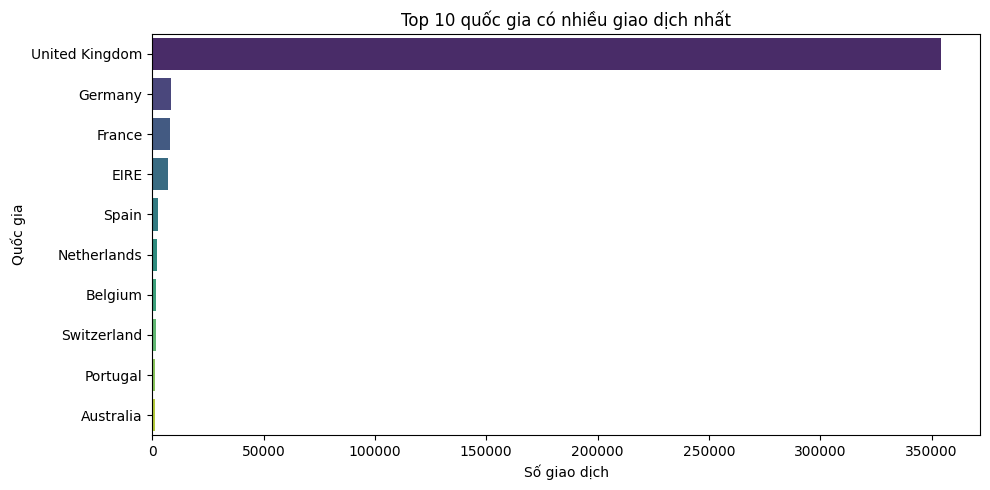

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 quốc gia có nhiều giao dịch nhất")
plt.xlabel("Số giao dịch")
plt.ylabel("Quốc gia")
plt.tight_layout()
plt.show()


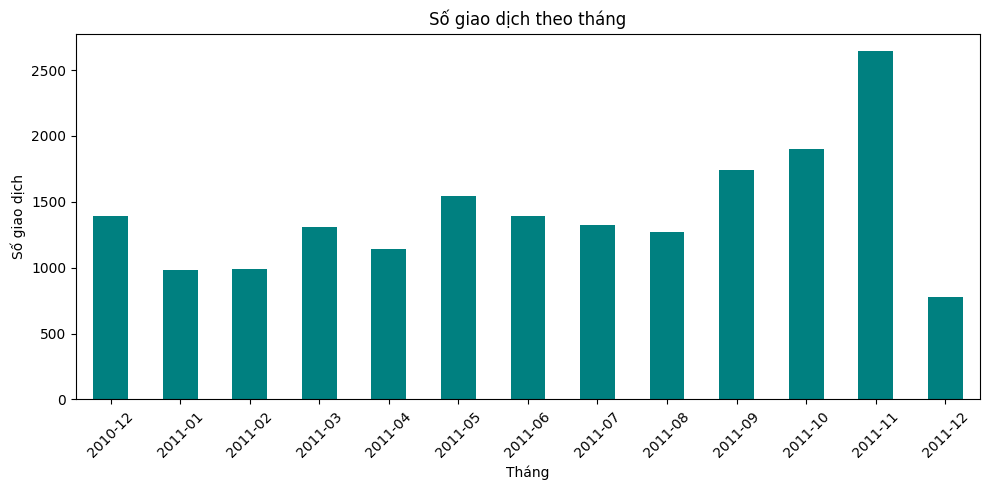

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_tx = df.groupby('Month')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 5))
monthly_tx.plot(kind='bar', color='teal')
plt.title('Số giao dịch theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số giao dịch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


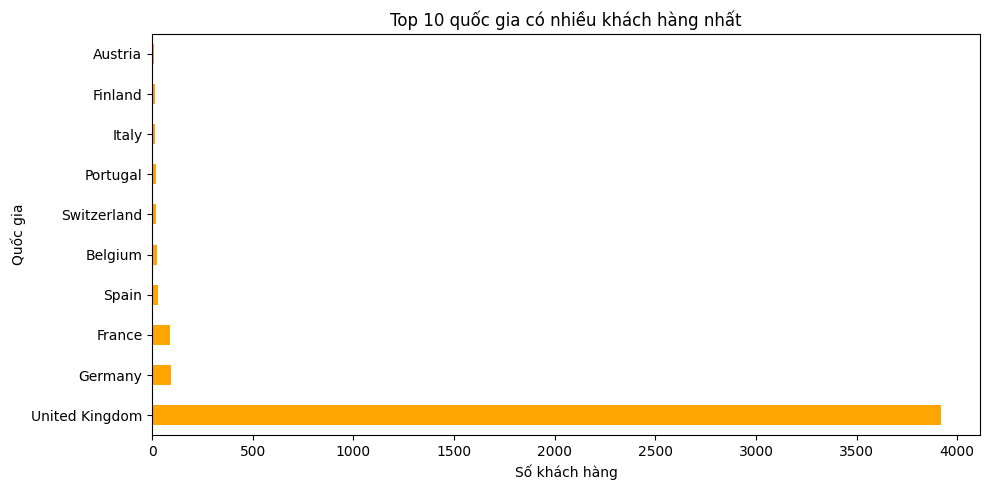

In [ ]:
customer_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
customer_country.plot(kind='barh', color='orange')
plt.title('Top 10 quốc gia có nhiều khách hàng nhất')
plt.xlabel('Số khách hàng')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.show()


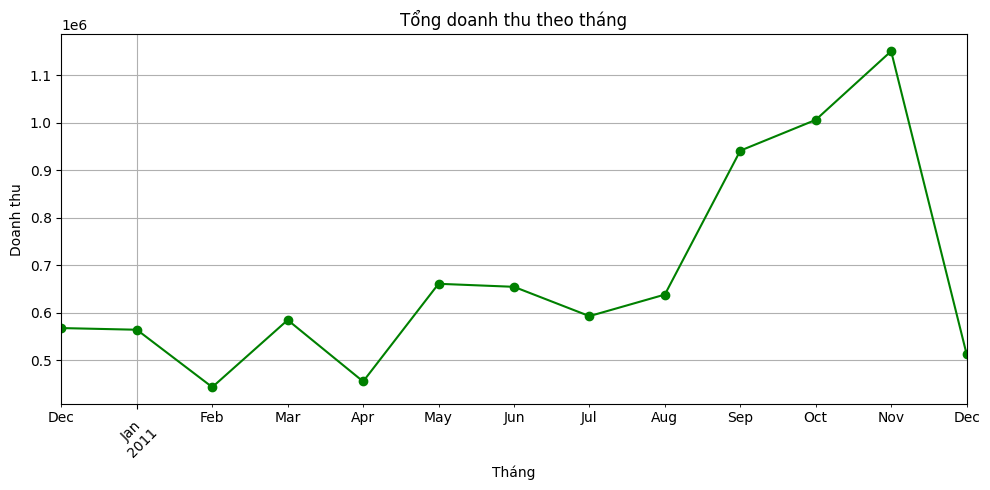

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_monthly = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
revenue_monthly.plot(kind='line', marker='o', color='green')
plt.title('Tổng doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-3236711016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='mako')


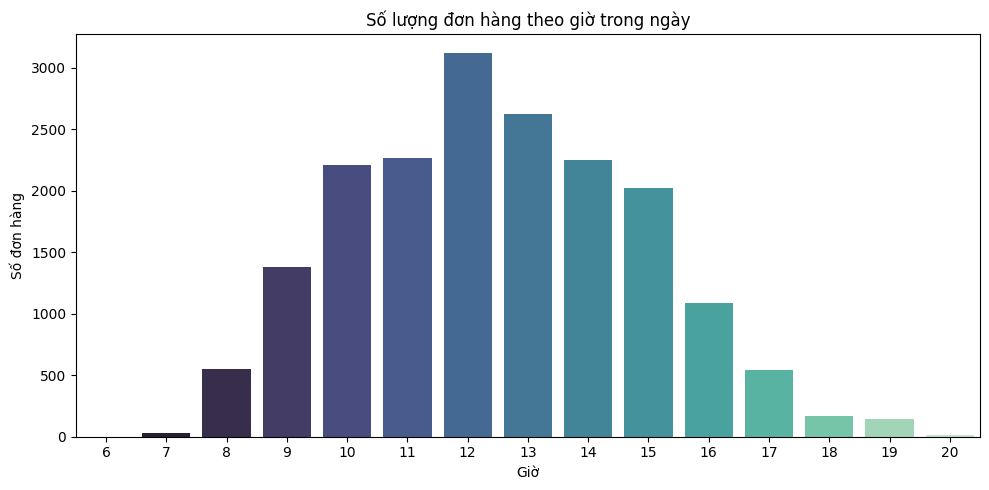

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='mako')
plt.title('Số lượng đơn hàng theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số đơn hàng')
plt.tight_layout()
plt.show()


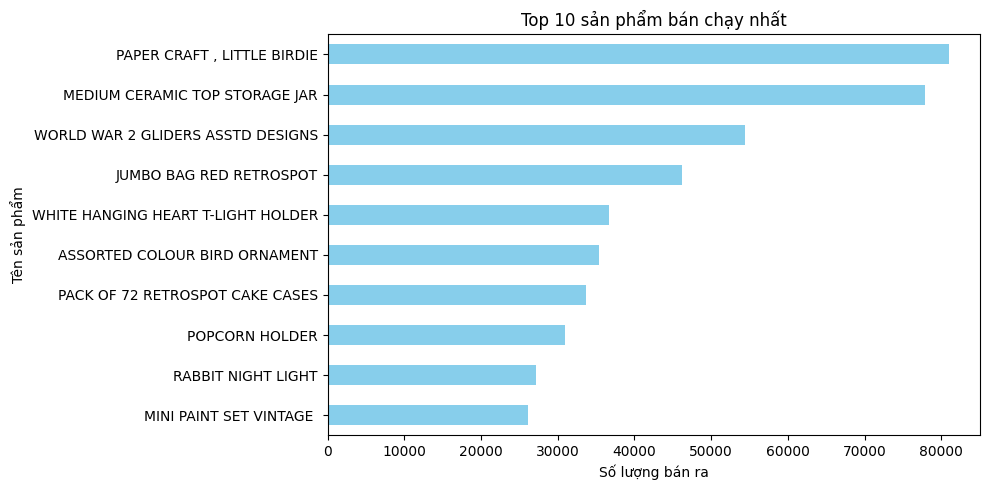

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 sản phẩm bán chạy nhất')
plt.xlabel('Số lượng bán ra')
plt.ylabel('Tên sản phẩm')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


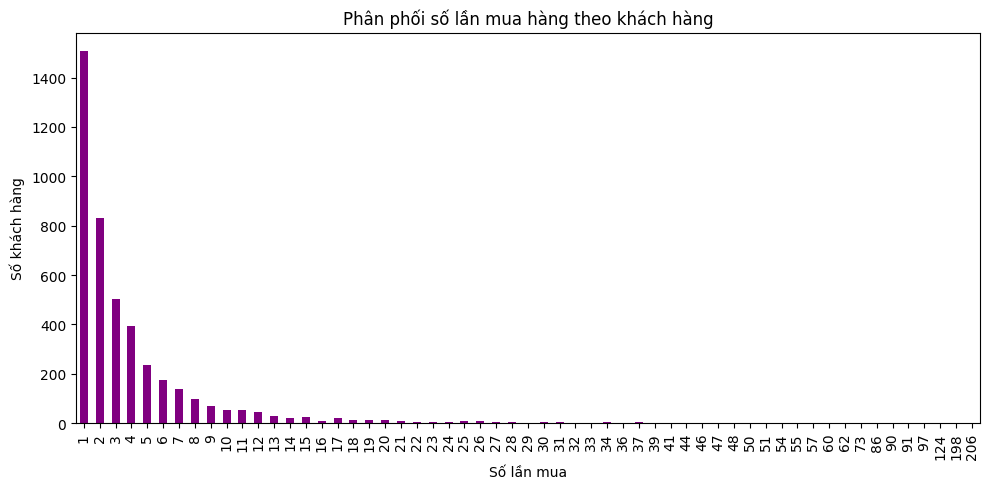

In [ ]:
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = repeat_customers.value_counts().sort_index()

plt.figure(figsize=(10, 5))
repeat_customers.plot(kind='bar', color='purple')
plt.title('Phân phối số lần mua hàng theo khách hàng')
plt.xlabel('Số lần mua')
plt.ylabel('Số khách hàng')
plt.tight_layout()
plt.show()


# Rút trích đặc trưng

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,TotalPrice,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,20.34,8


In [ ]:
import pandas as pd

# Chuyển InvoiceDate thành datetime nếu chưa
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Ngày tham chiếu để tính "Recency"
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Rút trích đặc trưng
features = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': pd.Series.nunique,                            # Frequency
    'TotalPrice': 'sum',                                       # Monetary
    'StockCode': pd.Series.nunique,                            # UniqueItems
    'Quantity': 'sum'                                          # TotalQuantity
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary',
    'StockCode': 'UniqueItems',
    'Quantity': 'TotalQuantity'
})

# Giỏ hàng trung bình
features['AvgBasketSize'] = features['TotalQuantity'] / features['Frequency']

# Xem kết quả
print(features.head())


            Recency  Frequency  Monetary  UniqueItems  TotalQuantity  \
CustomerID                                                             
12346           326          1  77183.60            1          74215   
12347             2          7   4310.00          103           2458   
12348            75          4   1437.24           21           2332   
12349            19          1   1457.55           72            630   
12350           310          1    294.40           16            196   

            AvgBasketSize  
CustomerID                 
12346        74215.000000  
12347          351.142857  
12348          583.000000  
12349          630.000000  
12350          196.000000  


Recency: Số ngày kể từ lần mua cuối

Frequency: Số lượng hóa đơn khác nhau

Monetary: Tổng số tiền chi tiêu

UniqueItems: Số loại sản phẩm khác nhau đã mua

TotalQuantity: Tổng số sản phẩm đã mua

AvgBasketSize: Kích thước trung bình mỗi đơn hàng



In [ ]:
features.head()

,Recency,Frequency,Monetary,UniqueItems,TotalQuantity,AvgBasketSize
CustomerID,,,,,,
12346,326,1,77183.60,1,74215,74215.000000
12347,2,7,4310.00,103,2458,351.142857
12348,75,4,1437.24,21,2332,583.000000
12349,19,1,1457.55,72,630,630.000000
12350,310,1,294.40,16,196,196.000000


Tương quan với Monetary:
 Monetary         1.000000
TotalQuantity    0.923306
Frequency        0.549186
UniqueItems      0.379535
AvgBasketSize    0.311109
Recency         -0.121179
Name: Monetary, dtype: float64


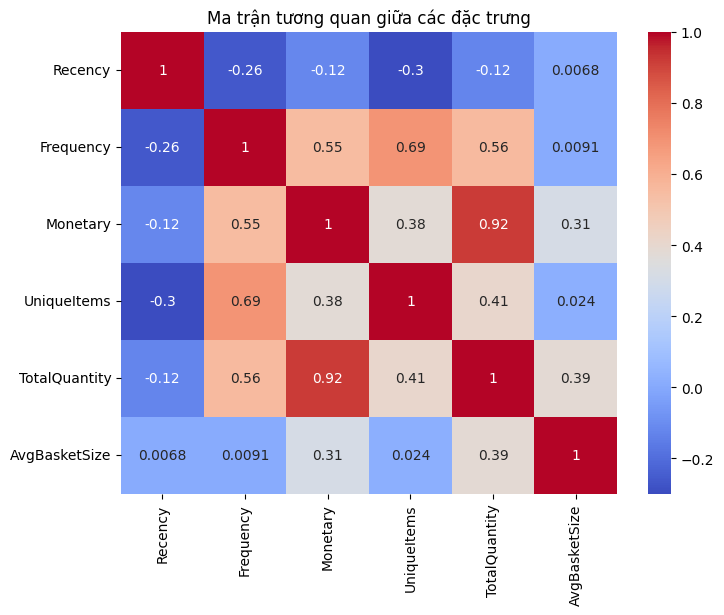

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = features.corr(numeric_only=True)

# In ra tương quan với Monetary
monetary_corr = corr_matrix['Monetary'].sort_values(ascending=False)
print("Tương quan với Monetary:\n", monetary_corr)

# Vẽ heatmap trực quan
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


Tương quan với Recency  :
 Recency          1.000000
AvgBasketSize    0.006849
Monetary        -0.121179
TotalQuantity   -0.123444
Frequency       -0.261087
UniqueItems     -0.300089
Name: Recency, dtype: float64


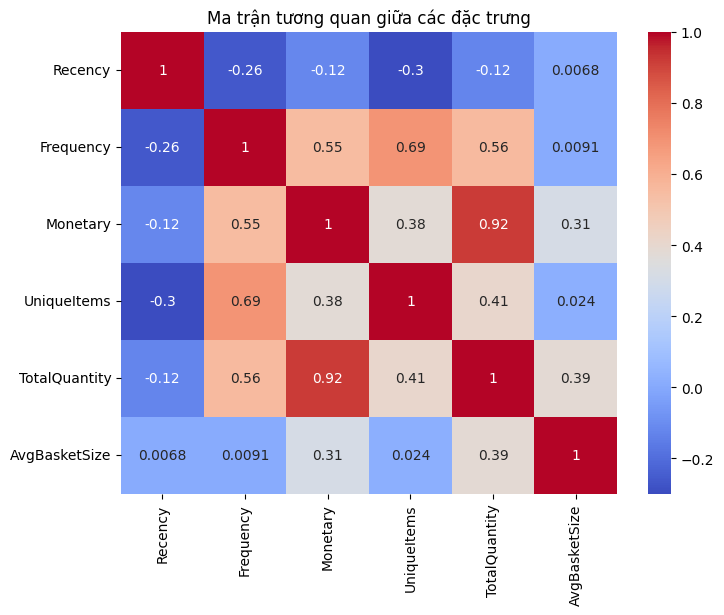

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = features.corr(numeric_only=True)

# In ra tương quan với Monetary
monetary_corr = corr_matrix['Recency'].sort_values(ascending=False)
print("Tương quan với Recency  :\n", monetary_corr)

# Vẽ heatmap trực quan
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


Tương quan với Frequency  :
 Frequency        1.000000
UniqueItems      0.691370
TotalQuantity    0.556919
Monetary         0.549186
AvgBasketSize    0.009132
Recency         -0.261087
Name: Frequency, dtype: float64


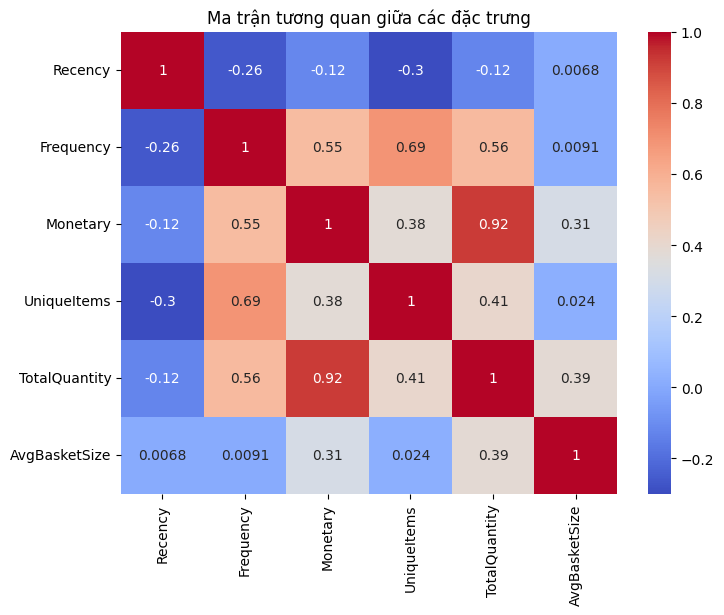

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = features.corr(numeric_only=True)

# In ra tương quan với Monetary
monetary_corr = corr_matrix['Frequency'].sort_values(ascending=False)
print("Tương quan với Frequency  :\n", monetary_corr)

# Vẽ heatmap trực quan
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


Mặc dù đặc trưng được chọn theo mức độ tương quan với F (Frequency) hoặc R (Recency) khác nhau về mặt kỹ thuật, tuy nhiên chúng đều biểu diễn các hành vi cốt lõi của khách hàng, chẳng hạn như số lượng giao dịch, số lượng sản phẩm hoặc mức độ tương tác. Vì vậy, khi đưa vào thuật toán k-Medoids, các biến này vẫn đại diện cho cùng một bản chất hành vi, dẫn đến kết quả phân cụm không thay đổi đáng kể.

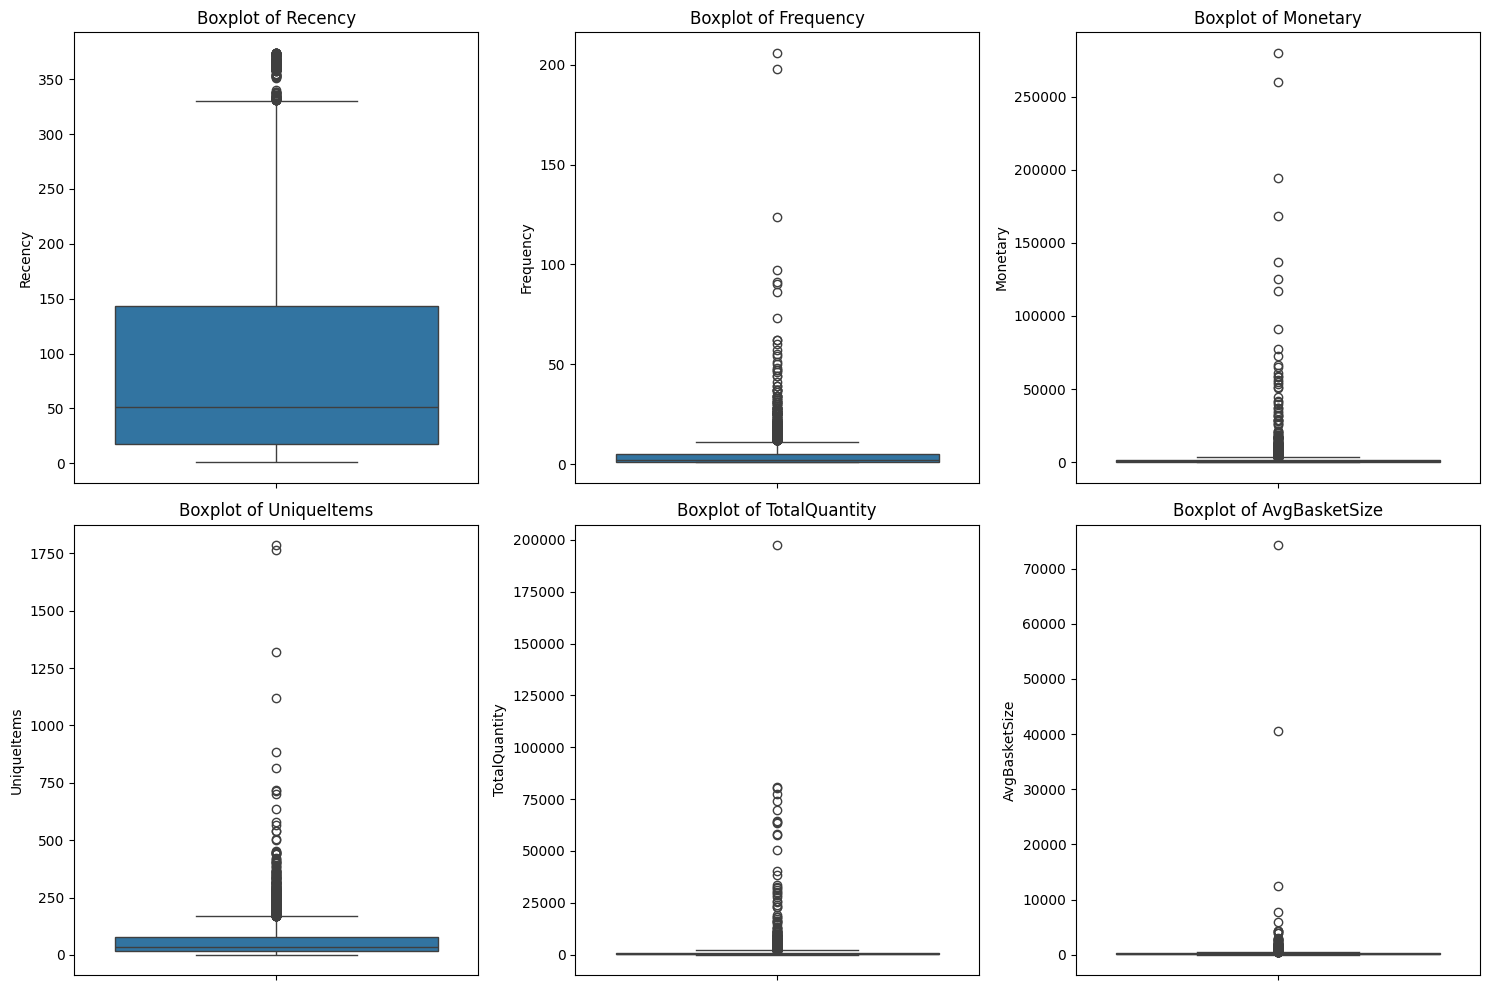

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo boxplot cho từng cột
plt.figure(figsize=(15, 10))
for i, col in enumerate(features.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=features[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        4335 non-null   int64  
 1   Frequency      4335 non-null   int64  
 2   Monetary       4335 non-null   float64
 3   UniqueItems    4335 non-null   int64  
 4   TotalQuantity  4335 non-null   int64  
 5   AvgBasketSize  4335 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 366.1+ KB


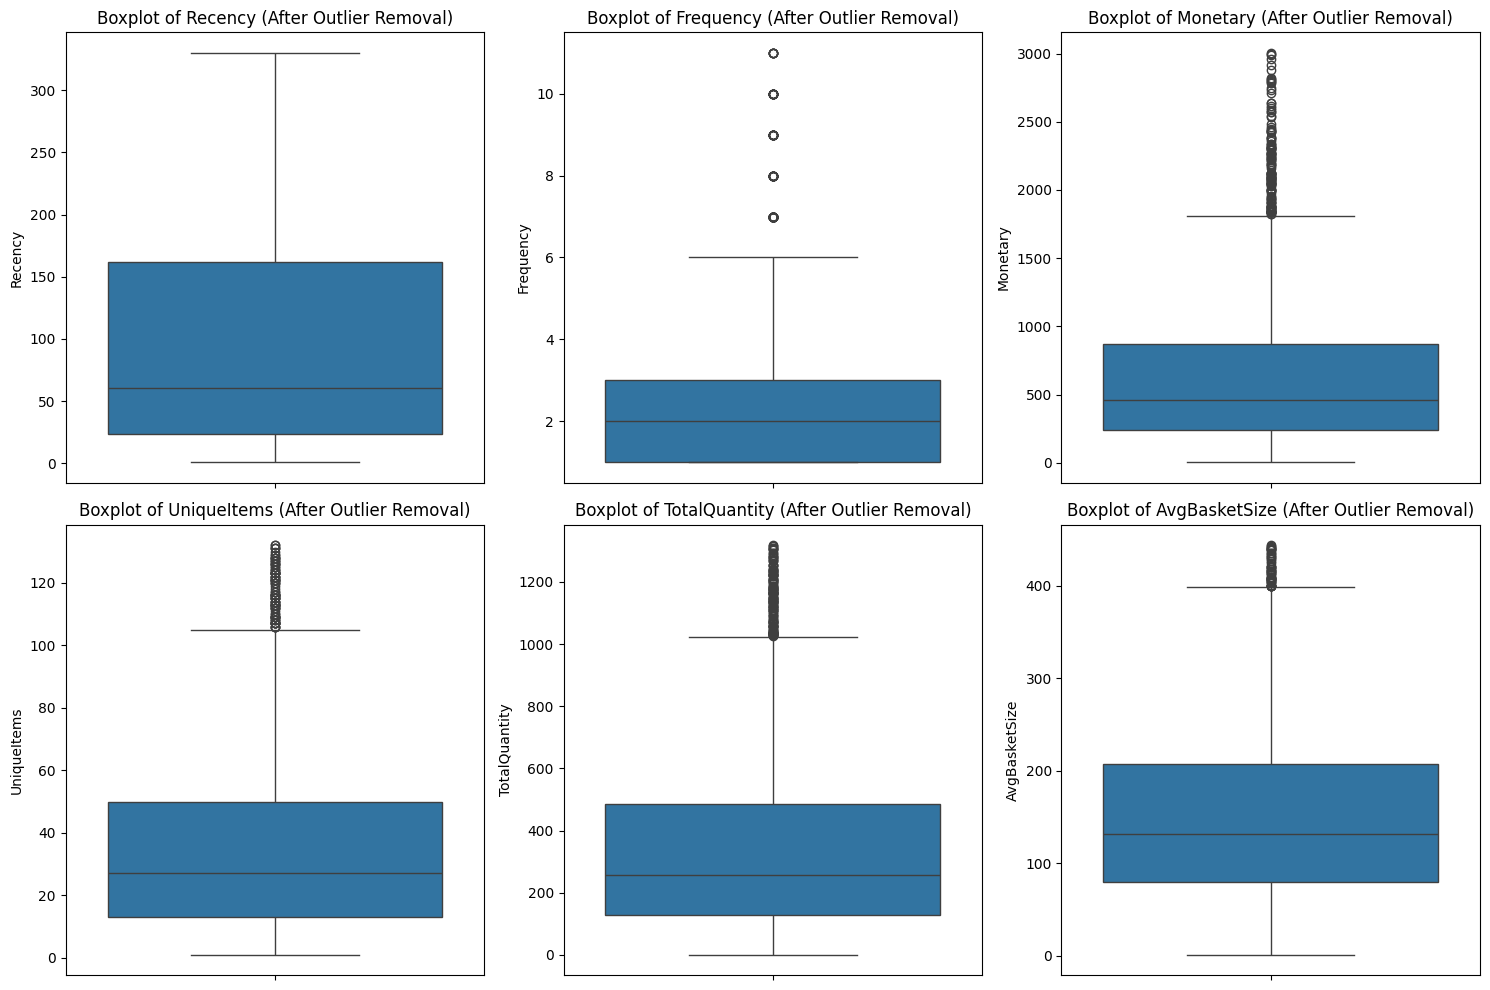

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử 'features' là DataFrame ban đầu
features_clean = features.copy()

# Loại bỏ outliers bằng IQR cho từng cột
for col in features_clean.columns:
    Q1 = features_clean[col].quantile(0.25)
    Q3 = features_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    features_clean = features_clean[(features_clean[col] >= lower_bound) & (features_clean[col] <= upper_bound)]

# Vẽ boxplot sau khi xử lý outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_clean.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=features_clean[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.tight_layout()
plt.show()


In [ ]:
features_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3025 entries, 12350 to 18282
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Recency        3025 non-null   int64  
 1   Frequency      3025 non-null   int64  
 2   Monetary       3025 non-null   float64
 3   UniqueItems    3025 non-null   int64  
 4   TotalQuantity  3025 non-null   int64  
 5   AvgBasketSize  3025 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 230.0+ KB


# So sánh giữa rút trích và k trích

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_clean)


In [ ]:
scaled_data = pd.DataFrame(scaled_data, columns=features_clean.columns)
scaled_data.head()

,Recency,Frequency,Monetary,UniqueItems,TotalQuantity,AvgBasketSize
0,2.291900,-0.803258,-0.633855,-0.664488,-0.520886,0.460117
1,-0.674774,2.580158,1.384083,0.764187,0.582290,-0.809951
2,1.144209,-0.803258,-1.013649,-1.082637,-1.109246,-1.389439
3,1.252481,-0.803258,-0.328763,-0.769025,-0.373796,0.922506
4,-1.042901,-0.239356,0.537811,-0.803871,-0.367110,-0.328046


In [ ]:
selected_cols = ['Monetary', 'TotalQuantity', 'Frequency', 'UniqueItems']
scaled_selected = scaler.fit_transform(features_clean[selected_cols])


In [ ]:
scaled_selected = pd.DataFrame(scaled_selected, columns=selected_cols)
scaled_selected.head()

,Monetary,TotalQuantity,Frequency,UniqueItems
0,-0.633855,-0.520886,-0.803258,-0.664488
1,1.384083,0.582290,2.580158,0.764187
2,-1.013649,-1.109246,-0.803258,-1.082637
3,-0.328763,-0.373796,-0.803258,-0.769025
4,0.537811,-0.367110,-0.239356,-0.803871


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

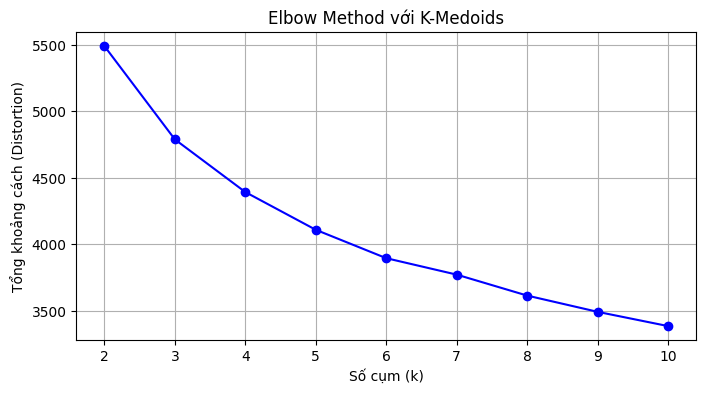

In [ ]:


def kmedoids_elbow(data, max_k=10):
    distortions = []
    K = range(2, max_k + 1)

    for k in K:
        kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam', metric='euclidean')
        kmedoids.fit(data)

        # Tính tổng khoảng cách từ mỗi điểm đến medoid gần nhất
        _, distances = pairwise_distances_argmin_min(data, kmedoids.cluster_centers_)
        distortion = np.sum(distances)
        distortions.append(distortion)

    # Vẽ biểu đồ elbow
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Số cụm (k)')
    plt.ylabel('Tổng khoảng cách (Distortion)')
    plt.title('Elbow Method với K-Medoids')
    plt.grid(True)
    plt.show()

# Gọi hàm với dữ liệu đã chuẩn hóa
kmedoids_elbow(scaled_data)


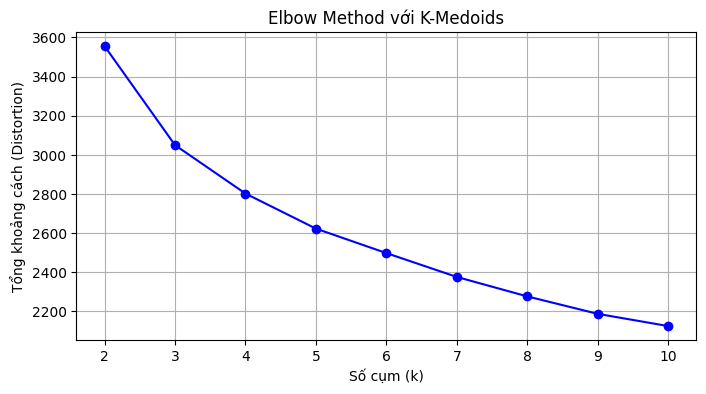

In [ ]:
kmedoids_elbow(scaled_selected)

In [ ]:
from sklearn.metrics import pairwise_distances

def cluster_internal_distances(data, labels):
    n_clusters = len(set(labels))
    internal_dists = []
    for i in range(n_clusters):
        cluster_points = data[labels == i]
        dist = pairwise_distances(cluster_points)
        avg_dist = dist.sum() / (len(cluster_points) * (len(cluster_points) - 1))  # trung bình khoảng cách trong cụm
        internal_dists.append(avg_dist)
    return internal_dists


In [ ]:
model = KMedoids(n_clusters=4, method='pam')
labels = model.fit_predict(scaled_selected)
intra_dists = cluster_internal_distances(scaled_selected, labels)

for i, d in enumerate(intra_dists):
    print(f"Cụm {i} → Độ phân tán trung bình: {d:.4f}")


Cụm 0 → Độ phân tán trung bình: 0.6009
Cụm 1 → Độ phân tán trung bình: 2.4537
Cụm 2 → Độ phân tán trung bình: 1.1882
Cụm 3 → Độ phân tán trung bình: 1.8927


In [ ]:
model = KMedoids(n_clusters=3, method='pam')
labels = model.fit_predict(scaled_selected)
intra_dists = cluster_internal_distances(scaled_selected, labels)

for i, d in enumerate(intra_dists):
    print(f"Cụm {i} → Độ phân tán trung bình: {d:.4f}")

Cụm 0 → Độ phân tán trung bình: 0.7449
Cụm 1 → Độ phân tán trung bình: 2.5546
Cụm 2 → Độ phân tán trung bình: 1.5961


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_kmedoids(X, n_clusters):
    model = KMedoids(n_clusters=n_clusters, random_state=42, method='pam').fit(X)
    labels = model.labels_
    sil_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    return model, sil_score, db_score


In [ ]:
model_sel, sil_sel, db_sel = evaluate_kmedoids(scaled_selected, 3)
print("== Rút trích ==")
print("Silhouette Score:", sil_sel)
print("Davies-Bouldin Score:", db_sel)


== Rút trích ==
Silhouette Score: 0.3543759083710083
Davies-Bouldin Score: 1.0717225251388813


In [ ]:
model_all, sil_all, db_all = evaluate_kmedoids(scaled_data, 3)
print("== Không rút trích ==")
print("Silhouette Score:", sil_all)
print("Davies-Bouldin Score:", db_all)


== Không rút trích ==
Silhouette Score: 0.2706623871789465
Davies-Bouldin Score: 1.2531176587811643


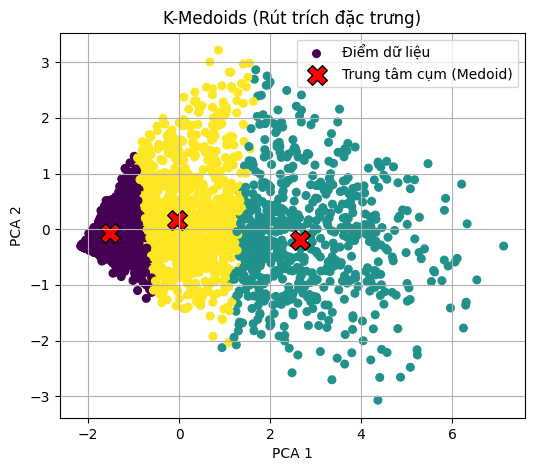

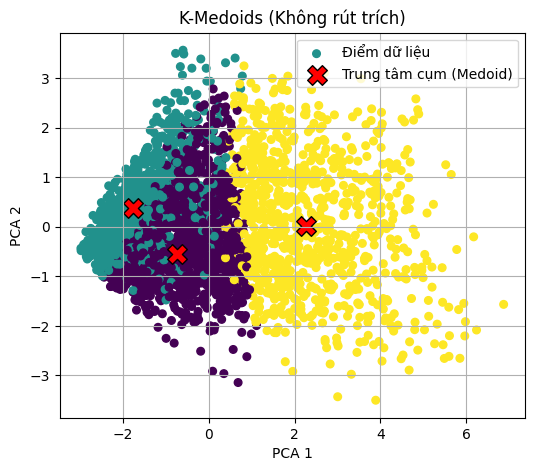

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters(X, labels, medoid_indices, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)
    medoid_coords = reduced[medoid_indices]  # Chiếu medoids sang không gian PCA

    plt.figure(figsize=(6, 5))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis', s=30, label='Điểm dữ liệu')
    plt.scatter(medoid_coords[:, 0], medoid_coords[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Trung tâm cụm (Medoid)')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Vẽ cụm có rút trích đặc trưng
plot_clusters(scaled_selected, model_sel.labels_, model_sel.medoid_indices_, "K-Medoids (Rút trích đặc trưng)")

# Vẽ cụm không rút trích đặc trưng
plot_clusters(scaled_data, model_all.labels_, model_all.medoid_indices_, "K-Medoids (Không rút trích)")


=> Với k = 3 và thuật toán của thư viện có thể thấy rằng việc rút trích đặc
trưng cho kết quả tốt hơn


# So sánh giữa cài thủ công và cài thư viện

In [ ]:
selected_cols = ['Monetary', 'TotalQuantity', 'Frequency', 'UniqueItems']
X = scaler.fit_transform(features_clean[selected_cols])

In [ ]:
import random

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def initialize_medoids(X, k):
    indices = random.sample(range(len(X)), k)
    return indices

def assign_clusters(X, medoid_indices):
    clusters = {}
    for idx in range(len(medoid_indices)):
        clusters[idx] = []

    for i, x in enumerate(X):
        distances = [euclidean_distance(x, X[m]) for m in medoid_indices]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(i)

    return clusters

def update_medoids(X, clusters):
    new_medoids = []
    for cluster in clusters.values():
        min_dist_sum = float('inf')
        medoid = cluster[0]
        for i in cluster:
            dist_sum = sum([euclidean_distance(X[i], X[j]) for j in cluster])
            if dist_sum < min_dist_sum:
                min_dist_sum = dist_sum
                medoid = i
        new_medoids.append(medoid)
    return new_medoids

def kmedoids(X, k, max_iter=100):
    medoid_indices = initialize_medoids(X, k)
    for _ in range(max_iter):
        clusters = assign_clusters(X, medoid_indices)
        new_medoids = update_medoids(X, clusters)
        if set(new_medoids) == set(medoid_indices):
            break
        else:
            medoid_indices = new_medoids
    return clusters, medoid_indices


In [ ]:


def evaluate_kmedoids(X, clusters, medoid_indices):
    # Tạo nhãn cụm cho từng điểm
    labels = np.zeros(len(X))
    for cluster_idx, points in clusters.items():
        for point_idx in points:
            labels[point_idx] = cluster_idx
    s_score = silhouette_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    return labels, s_score, db_score


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca_clusters(X, labels, medoid_indices):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)

    plt.figure(figsize=(8, 5))
    for i in np.unique(labels):
        plt.scatter(reduced[labels == i, 0], reduced[labels == i, 1], label=f"Cluster {int(i)}")

    plt.scatter(reduced[medoid_indices, 0], reduced[medoid_indices, 1], c='black', marker='X', s=200, label='Medoids')
    plt.legend()
    plt.title("PCA Visualization of K-Medoids Clustering")
    plt.show()


Silhouette Score: 0.3750100139026951
Davies-Bouldin Score: 1.10877098112052


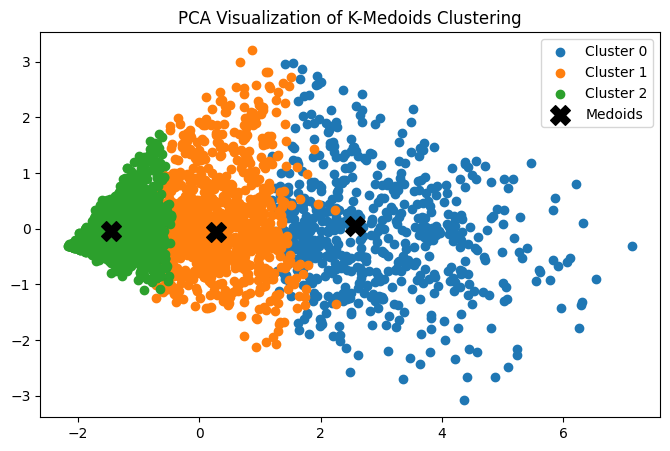

In [ ]:
# Thực hiện phân cụm
clusters, medoid_indices = kmedoids(X, k=3)
labels, silhouette, db = evaluate_kmedoids(X, clusters, medoid_indices)

# Hiển thị kết quả
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", db)

# Vẽ cụm
plot_pca_clusters(X, labels, medoid_indices)


# Thuật toán khác


=== Kết quả K-Means ===
Silhouette Score (K-Means): 0.4160
Davies-Bouldin Score (K-Means): 1.0803


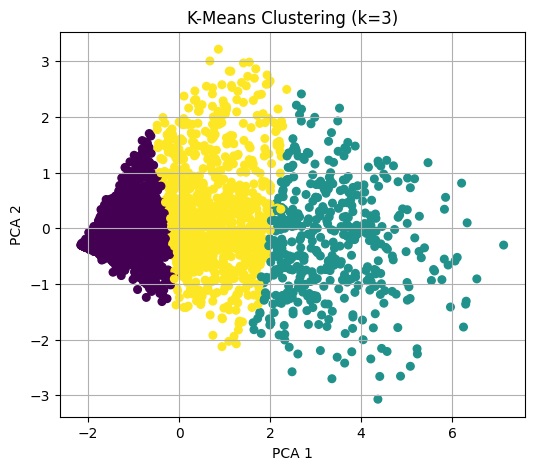

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings

# Tắt cảnh báo về số lượng khởi tạo n_init không tường minh trong scikit-learn >= 1.2
warnings.filterwarnings("ignore", category=FutureWarning)

# Dữ liệu sử dụng để so sánh (scaled_selected từ phần trước)
X_compare = scaled_selected

# Số cụm k = 3
k_compare = 3

# Huấn luyện mô hình K-Means
kmeans_model = KMeans(n_clusters=k_compare, random_state=42, n_init='auto') # n_init='auto' là mặc định mới của sklearn
kmeans_model.fit(X_compare)
kmeans_labels = kmeans_model.labels_

# Đánh giá K-Means
kmeans_silhouette = silhouette_score(X_compare, kmeans_labels, metric='euclidean')
kmeans_davies_bouldin = davies_bouldin_score(X_compare, kmeans_labels)

print("\n=== Kết quả K-Means ===")
print(f"Silhouette Score (K-Means): {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Score (K-Means): {kmeans_davies_bouldin:.4f}")

# Trực quan hóa K-Means
plot_clusters(X_compare, kmeans_labels, "K-Means Clustering (k=3)")


=== Kết quả Agglomerative Clustering ===
Silhouette Score (Agglomerative): 0.3206
Davies-Bouldin Score (Agglomerative): 1.2287


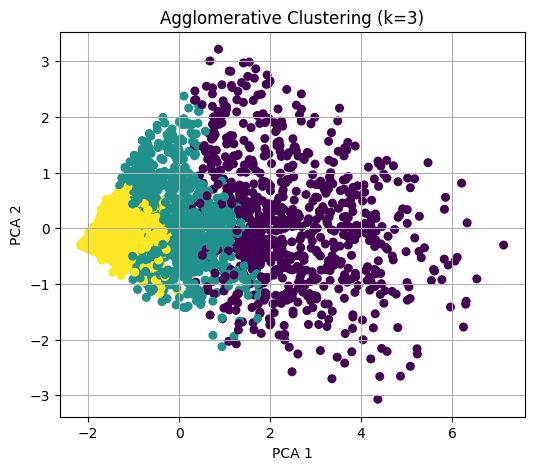

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Dữ liệu sử dụng để so sánh (scaled_selected)
X_compare = scaled_selected
k_compare = 3

# Huấn luyện mô hình Agglomerative Clustering
# 'linkage' có thể là 'ward', 'complete', 'average', 'single'
# 'ward' thường được dùng cho Euclidean distance và mục tiêu tạo ra các cụm có kích thước tương đương
agg_model = AgglomerativeClustering(n_clusters=k_compare, linkage='ward')
agg_labels = agg_model.fit_predict(X_compare)

# Đánh giá Agglomerative Clustering
agg_silhouette = silhouette_score(X_compare, agg_labels, metric='euclidean')
agg_davies_bouldin = davies_bouldin_score(X_compare, agg_labels)

print("\n=== Kết quả Agglomerative Clustering ===")
print(f"Silhouette Score (Agglomerative): {agg_silhouette:.4f}")
print(f"Davies-Bouldin Score (Agglomerative): {agg_davies_bouldin:.4f}")

# Trực quan hóa Agglomerative Clustering
plot_clusters(X_compare, agg_labels, "Agglomerative Clustering (k=3)")


Số cụm được tìm thấy bởi DBSCAN: 16
Số điểm nhiễu (outlier): 417

=== Kết quả DBSCAN (chỉ các cụm lõi) ===
Silhouette Score (DBSCAN): 0.1349
Davies-Bouldin Score (DBSCAN): 1.4746


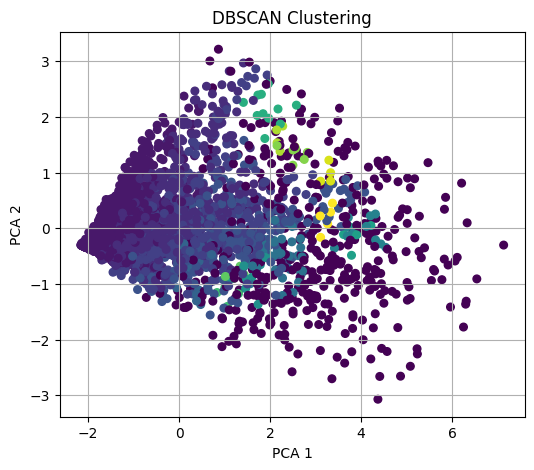

In [ ]:
from sklearn.cluster import DBSCAN

# Dữ liệu sử dụng để so sánh (scaled_selected)
X_compare = scaled_selected

# Khởi tạo và huấn luyện mô hình DBSCAN
# Bạn có thể cần điều chỉnh eps và min_samples
# Ví dụ: eps=0.5, min_samples=5 (giá trị điển hình, cần điều chỉnh theo dữ liệu)
dbscan_model = DBSCAN(eps=0.5, min_samples=5) # Thay đổi giá trị này nếu cần
dbscan_labels = dbscan_model.fit_predict(X_compare)

# Các điểm được gán nhãn -1 là nhiễu (outlier)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"\nSố cụm được tìm thấy bởi DBSCAN: {n_clusters_dbscan}")
print(f"Số điểm nhiễu (outlier): {list(dbscan_labels).count(-1)}")

# Đánh giá DBSCAN
# Chỉ đánh giá nếu có ít nhất 2 cụm (không tính nhiễu)
if n_clusters_dbscan >= 2:
    # Lọc bỏ các điểm nhiễu (-1) trước khi tính Silhouette và Davies-Bouldin
    core_samples_mask = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(X_compare[core_samples_mask], dbscan_labels[core_samples_mask], metric='euclidean')
    dbscan_davies_bouldin = davies_bouldin_score(X_compare[core_samples_mask], dbscan_labels[core_samples_mask])

    print("\n=== Kết quả DBSCAN (chỉ các cụm lõi) ===")
    print(f"Silhouette Score (DBSCAN): {dbscan_silhouette:.4f}")
    print(f"Davies-Bouldin Score (DBSCAN): {dbscan_davies_bouldin:.4f}")
else:
    print("\nDBSCAN tìm thấy ít hơn 2 cụm (không tính nhiễu) hoặc chỉ toàn nhiễu, không thể tính Silhouette/Davies-Bouldin Score.")
    dbscan_silhouette = np.nan # Not a number
    dbscan_davies_bouldin = np.nan

# Trực quan hóa DBSCAN (bao gồm cả nhiễu)
plot_clusters(X_compare, dbscan_labels, "DBSCAN Clustering")

In [ ]:
scaled_selected['Cluster'] = model_sel.labels_
cluster_summary = scaled_selected.groupby('Cluster').mean()
print(cluster_summary)
print(scaled_selected['Cluster'].value_counts())


         Monetary  TotalQuantity  Frequency  UniqueItems
Cluster                                                 
0       -0.726474      -0.733008  -0.652997    -0.719495
1        1.542647       1.544027   1.422963     1.110148
2        0.021752       0.029085  -0.001205     0.260107
Cluster
0    1336
2    1075
1     614
Name: count, dtype: int64


In [ ]:
features_clean['Cluster'] = model_sel.labels_
cluster_summary = features_clean.groupby('Cluster')[selected_cols].mean()
counts = features_clean['Cluster'].value_counts().sort_index()

print(cluster_summary)
print(counts)


            Monetary  TotalQuantity  Frequency  UniqueItems
Cluster                                                    
0         244.310023     132.546407   1.266467    14.421407
1        1471.494924     813.690554   4.947883    66.928339
2         648.965323     360.516279   2.422326    42.533953
Cluster
0    1336
1     614
2    1075
Name: count, dtype: int64
